In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [165]:
funnel  = pd.read_csv("C:\\Users\\YunanYan\\Downloads\\funnel.csv")

In [166]:
# From bof - 2nd trx
# retention rate = 0.828
print((funnel.shape[0]-funnel.BOF_2_HIT_TIME.isna().sum())/funnel.shape[0])
# avg hit time = 3.477
print(funnel.BOF_2_HIT_TIME.mean())
# avg received engagement = 0.15
print(funnel.BOF_2_NUMBER_OF_RECEIVED_ENGAGEMENT.mean())
# avg openned engagement = 0.03
print(funnel.BOF_2_NUMBER_OF_OPENNED_ENGAGEMENT.mean())

0.8416607798864248
3.5454600066595496
0.14881347068672363
0.03192440651865206


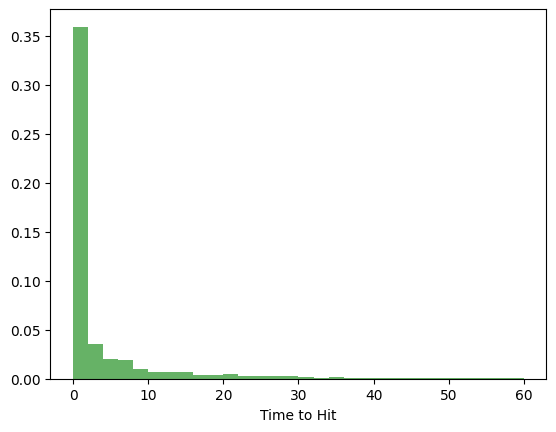

In [167]:
# BoF - 2nd TRX Hit Time Distribution
plt.hist(funnel.BOF_2_HIT_TIME, bins=30, density=True, alpha=0.6, color='g')
plt.xlabel("Time to Hit")
plt.show()

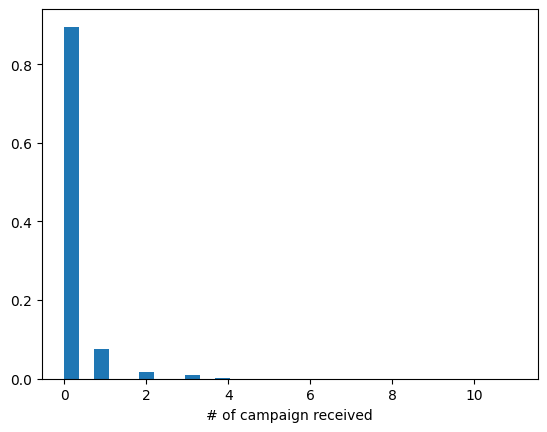

In [168]:
# BoF - 2nd TRX Distribution of  # of received engagement campaigns
weights = np.ones_like(funnel.BOF_2_NUMBER_OF_RECEIVED_ENGAGEMENT) / len(funnel.BOF_2_NUMBER_OF_RECEIVED_ENGAGEMENT)
plt.hist(funnel.BOF_2_NUMBER_OF_RECEIVED_ENGAGEMENT, bins=30, weights=weights)
plt.xlabel("# of campaign received")
plt.show()

In [169]:
# From 2nd - 3nd trx
# retention rate 
print((funnel.shape[0]-funnel.BOF_3_HIT_TIME.isna().sum())/funnel.shape[0])
# avg hit time 
print(funnel.BOF_3_HIT_TIME.mean())
# avg received engagement 
print(funnel.BOF_3_NUMBER_OF_RECEIVED_ENGAGEMENT.mean())
# avg openned engagement 
print(funnel.BOF_3_NUMBER_OF_OPENNED_ENGAGEMENT.mean())

0.755161947852517
2.420497565734727
0.0900352340049319
0.021845371979503894


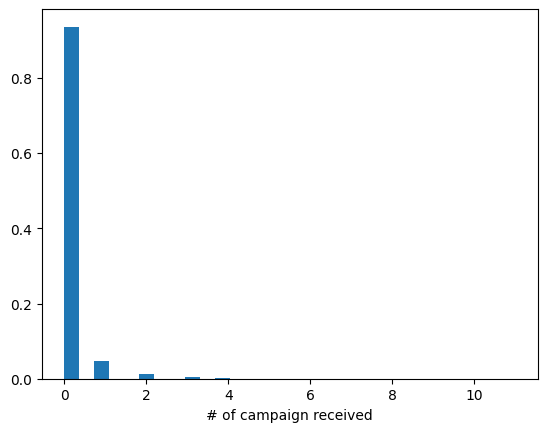

In [133]:
# 2nd - 3rd TRX Distribution of  # of received engagement campaigns
weights = np.ones_like(funnel.BOF_3_NUMBER_OF_RECEIVED_ENGAGEMENT) / len(funnel.BOF_3_NUMBER_OF_RECEIVED_ENGAGEMENT)
plt.hist(funnel.BOF_3_NUMBER_OF_RECEIVED_ENGAGEMENT, bins=30, weights=weights)
plt.xlabel("# of campaign received")
plt.show()

In [170]:
# From 4th - 5th trx
# retention rate 
print((funnel.shape[0]-funnel.BOF_5_HIT_TIME.isna().sum())/funnel.shape[0])
# avg hit time 
print(funnel.BOF_5_HIT_TIME.mean())
# avg received engagement 
print(funnel.BOF_5_NUMBER_OF_RECEIVED_ENGAGEMENT.mean())
# avg openned engagement 
print(funnel.BOF_5_NUMBER_OF_OPENNED_ENGAGEMENT.mean())

0.6499077617378064
1.6084199295375485
0.04652939995290576
0.013527315382626269


In [ ]:
# GPV Seg

In [171]:
gpv_seg = pd.read_csv("C:\\Users\\YunanYan\\Downloads\\gpv_seg.csv")
gpv_seg.MERCHANT_SEGMENT.value_counts()

MERCHANT_SEGMENT
Micro         678087
SMB            11704
Mid-Market      2436
Enterprise         2
Name: count, dtype: int64

In [ ]:
# country seg

In [172]:
ctry_seg = pd.read_csv("C:\\Users\\YunanYan\\Downloads\\country_seg.csv")
ctry_seg.RECEIPT_COUNTRY_CODE.value_counts()

RECEIPT_COUNTRY_CODE
US    528986
AU     67388
CA     54946
GB     22682
JP     15919
FR       944
IE       687
ES       677
Name: count, dtype: int64

In [173]:
 # mcc channel

In [97]:
mcc_seg = pd.read_csv("C:\\Users\\YunanYan\\Downloads\\mcc_seg.csv")
mcc_seg.MCC.value_counts()

MCC
UNKNOWN                               307170
retail                                 81425
food_and_drink                         73152
charities_education_and_membership     48813
professional_services                  45239
leisure_and_entertainment              32212
beauty_and_personal_care               30047
health_care_and_fitness                24576
home_and_repair                        23809
casual_use                             20565
transportation                          5221
Name: count, dtype: int64

In [174]:
# GPV segmentation analysis on time to convert 
funnel_gpv_seg = funnel.merge(gpv_seg, how="inner",on="MERCHANT_TOKEN")
seg_list = funnel_gpv_seg.MERCHANT_SEGMENT.unique().tolist()
for seg in seg_list:
    data_seg = funnel_gpv_seg[(funnel_gpv_seg.MERCHANT_SEGMENT==seg)]
    print(seg)
    print("-----------")
    print((data_seg.shape[0]-data_seg.BOF_2_HIT_TIME.isna().sum())/data_seg.shape[0])
    print((data_seg.shape[0]-data_seg.BOF_3_HIT_TIME.isna().sum())/data_seg.shape[0])
    print((data_seg.shape[0]-data_seg.BOF_4_HIT_TIME.isna().sum())/data_seg.shape[0])
    print((data_seg.shape[0]-data_seg.BOF_5_HIT_TIME.isna().sum())/data_seg.shape[0])
    


Micro
-----------
0.8406104231462924
0.7533723548748169
0.6934995067004677
0.647073310651878
Mid-Market
-----------
0.8600164203612479
0.8021346469622331
0.7758620689655172
0.756568144499179
SMB
-----------
0.8986671223513328
0.849025974025974
0.8152768284347232
0.7919514695830485
Enterprise
-----------
1.0
1.0
1.0
0.5


In [157]:
# Country segmentation analysis on time to convert 
funnel_ctry_seg = funnel.merge(ctry_seg, how="inner",on="MERCHANT_TOKEN")
seg_list = funnel_ctry_seg.RECEIPT_COUNTRY_CODE.unique().tolist()
for seg in seg_list:
    data_seg = funnel_gpv_seg[(funnel_ctry_seg.RECEIPT_COUNTRY_CODE==seg)]
    print(seg)
    print("-----------")
    print((data_seg.shape[0]-data_seg.BOF_2_HIT_TIME.isna().sum())/data_seg.shape[0])
    print((data_seg.shape[0]-data_seg.BOF_3_HIT_TIME.isna().sum())/data_seg.shape[0])
    print((data_seg.shape[0]-data_seg.BOF_4_HIT_TIME.isna().sum())/data_seg.shape[0])
    print((data_seg.shape[0]-data_seg.BOF_5_HIT_TIME.isna().sum())/data_seg.shape[0])

US
-----------
0.8416423118948327
0.7549727213952733
0.6954021467486852
0.6495672853345835
AU
-----------
0.8421974238736867
0.7565887101561108
0.6980026117409628
0.6515106547159731
CA
-----------
0.8418993193317075
0.7542132275324864
0.695355439886434
0.6498198230990427
JP
-----------
0.8397512406558201
0.7552610088573403
0.6946416232175388
0.648093473208116
FR
-----------
0.8569915254237288
0.774364406779661
0.7171610169491526
0.6726694915254238
GB
-----------
0.8415483643417688
0.7572965346971167
0.7011727360902918
0.6535578873115245
IE
-----------
0.8151382823871907
0.7336244541484717
0.6870451237263464
0.6433770014556041
ES
-----------
0.8375184638109305
0.7592319054652881
0.7001477104874446
0.6587887740029542


In [175]:
# MCC segmentation analysis on time to convert 
funnel_mcc_seg = funnel.merge(mcc_seg, how="inner",on="MERCHANT_TOKEN")
seg_list = funnel_mcc_seg.MCC.unique().tolist()
for seg in seg_list:
    data_seg = funnel_mcc_seg[(funnel_mcc_seg.MCC==seg)]
    print(seg)
    print("-----------")
    print((data_seg.shape[0]-data_seg.BOF_2_HIT_TIME.isna().sum())/data_seg.shape[0])
    print((data_seg.shape[0]-data_seg.BOF_3_HIT_TIME.isna().sum())/data_seg.shape[0])
    print((data_seg.shape[0]-data_seg.BOF_4_HIT_TIME.isna().sum())/data_seg.shape[0])
    print((data_seg.shape[0]-data_seg.BOF_5_HIT_TIME.isna().sum())/data_seg.shape[0])

professional_services
-----------
0.7367094763367891
0.6049868476314684
0.523552686841
0.46230022767965695
UNKNOWN
-----------
0.8550476934596477
0.7755770420288439
0.7200345085783116
0.6767978643747762
charities_education_and_membership
-----------
0.9027513162477209
0.8458197611292074
0.8042529653985618
0.7679511605514925
transportation
-----------
0.7760965332311818
0.6485347634552767
0.5755602375023942
0.5131200919364106
retail
-----------
0.8369665336198956
0.740632483880872
0.6704329137242862
0.6148848633712005
food_and_drink
-----------
0.9052247375328084
0.8516786964129484
0.8144274934383202
0.7841617454068242
leisure_and_entertainment
-----------
0.8551471501303862
0.7706444803178939
0.7120948714764684
0.6644107785918292
casual_use
-----------
0.7693168003890104
0.6434719183078045
0.562995380500851
0.5031363967906638
beauty_and_personal_care
-----------
0.855260092521716
0.77954537890638
0.7221686025227144
0.6807002362964689
health_care_and_fitness
-----------
0.806640625
0.69